In [2]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df = data.drop(columns=['Outcome'],axis = 1)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataScaled = scaler.fit_transform(df)
dataScaled = pd.DataFrame(dataScaled)

In [37]:
dataScaled.shape

(768, 8)

In [43]:
covarienceMatrix = dataScaled.T @ dataScaled/767
covarienceMatrix

,0,1,2,3,4,5,6,7
0,1.001304,0.129627,0.141466,-0.081778,-0.073630,0.017706,-0.033566,0.545051
1,0.129627,1.001304,0.152789,0.057403,0.331789,0.221359,0.137516,0.263858
2,0.141466,0.152789,1.001304,0.207641,0.089049,0.282173,0.041319,0.239840
3,-0.081778,0.057403,0.207641,1.001304,0.437352,0.393085,0.184167,-0.114119
4,-0.073630,0.331789,0.089049,0.437352,1.001304,0.198117,0.185312,-0.042218
5,0.017706,0.221359,0.282173,0.393085,0.198117,1.001304,0.140830,0.036289
6,-0.033566,0.137516,0.041319,0.184167,0.185312,0.140830,1.001304,0.033605
7,0.545051,0.263858,0.239840,-0.114119,-0.042218,0.036289,0.033605,1.001304


In [45]:
eigenValues, eigenVectors = np.linalg.eig(covarienceMatrix)

In [47]:
eigenValues

array([2.09711056, 1.73346726, 0.42036353, 0.40498938, 0.68351839,
       0.76333832, 0.87667054, 1.03097228])

In [59]:
PC1_data = dataScaled @ eigenVectors[:, 0]
PC1_data

0     -1.068503
1      1.121683
2      0.396477
3      1.115781
4     -2.359334
         ...   
763   -1.562085
764    0.100405
765    0.283475
766    1.060324
767    0.839892
Length: 768, dtype: float64

# PCA Implementation using sklearn

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(dataScaled)

array([[ 1.06850273,  1.23489499],
       [-1.12168331, -0.73385167],
       [-0.39647671,  1.59587594],
       ...,
       [-0.28347525,  0.09706503],
       [-1.06032431,  0.83706234],
       [-0.83989172, -1.15175485]])

In [68]:
from sklearn.decomposition import PCA
pca = PCA()
principal_component = pca.fit_transform(dataScaled)

In [74]:
pca.explained_variance_ratio_

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702, 0.05055776])

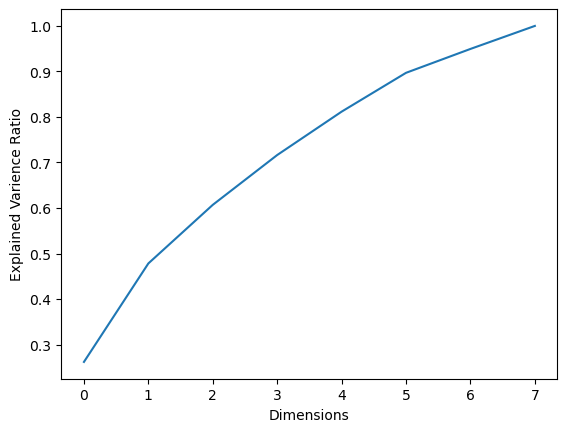

In [76]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Dimensions")
plt.ylabel("Explained Varience Ratio")
plt.show()